In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel('/content/FPS_hw_x_df_x_taxi.xlsx')
df.head()

,order_gk,weekday_key,hour_key,distance_km,offer_class_group,driver_response
0,412,7,22.967881,53.113626,Premium,1
1,436,3,19.439948,5.781342,Delivery,1
2,1327,6,19.816643,16.200071,Delivery,0
3,2013,2,19.123837,13.731643,Delivery,0
4,2241,6,23.164958,20.436380,Premium,1


In [6]:
df_economy = df[df['offer_class_group'] == 'Economy']
df_cmfrt = df[df['offer_class_group'] == 'Comfort']

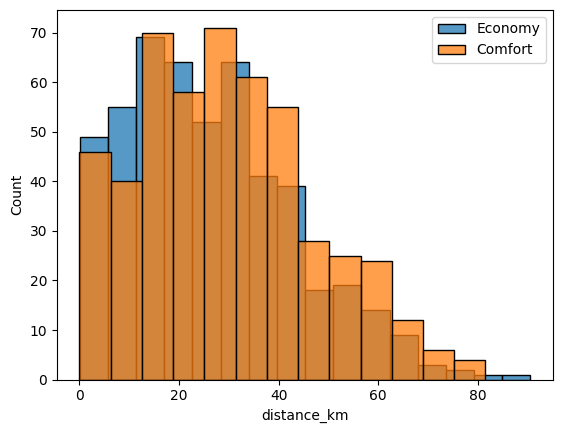

In [7]:
sns.histplot(df_economy['distance_km'])
sns.histplot(df_cmfrt['distance_km'])
plt.legend(['Economy', 'Comfort'])

In [13]:
from scipy.stats import skew

economy_skew = skew(df_economy['distance_km'],bias =False)
comfort_skew = skew(df_cmfrt['distance_km'],bias =False)
economy_skew, comfort_skew

(0.7042955486697889, 0.48244872525103555)

Распределения скошены -> нельзя применять параметрические тесты

In [11]:
from scipy.stats import ttest_ind, mannwhitneyu

# Используем значение 'less' для параметра alternative, так как согласно документации оно означает, что среднее первой выборки меньше среднего второй выборки
res_u = mannwhitneyu(df_economy['distance_km'], df_cmfrt['distance_km'], alternative='less')
res_u

(MannwhitneyuResult(statistic=110298.0, pvalue=0.0006424570722645601),
 TtestResult(statistic=-3.1706184453513386, pvalue=0.0007837550148556354, df=998.0))

Полученное значение p-value < 0.025, следовательно можем имеющиеся различия статистически значимы и мы можем отвергнуть нулевую гипотезу